# import each week of data in

In [1]:
import pandas as pd

filename = "../data/mahomes.csv"

df = pd.read_csv(filename)

# new approach -- look at data week by week
train set is previous weeks
test set is current week

Based on EDA, we care about 3 QB stats:
1. Completions
2. Passing Yards
3. Passing TDs
4. Rushing Yards
4. Rushing TDs

We will run linear regression on these 3 stats with the target being points scored.
Weights will start out at 1/3 and adjust based on accuracy.



In [2]:
df.describe()
df

x_stats = df.drop(['WEEK', 'OPP', 'ATT', 'PCT', 'AVG', 'INT', 'RAT', 'ATT.1', 'AVG.1', 'FPTS/G', 'FPTS'], axis=1)
y_points = df.iloc[:,15]

train_x = x_stats[6:]
train_y = y_points[6:]

test_x = x_stats[:5]
test_y = y_points[:5]

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
reg.fit(train_x, train_y)
mean_squared_error(test_y, reg.predict(test_x))

x_stats

,CMP,YDS,TD,YDS.1,TD.1
0,30,360,5,5,0
1,24,235,2,-1,0
2,20,262,1,26,0
3,23,249,3,34,0
4,29,292,4,28,0
...,...,...,...,...,...
68,23,295,4,52,0
69,35,377,2,-3,0
70,24,243,2,3,0
71,23,273,3,33,0


In [3]:
# use lasso or ridge instead of doing it myself, usually get better results
# lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)    #alpha is size of threshold, total weight of abs val of our features can't exceed alpha
lasso.fit(train_x, train_y)
mean_squared_error(test_y, lasso.predict(test_x))

30.44426501876752

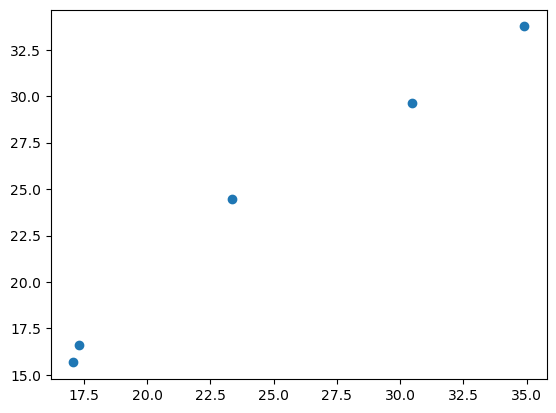

In [4]:
import matplotlib.pyplot as plt
plt.scatter(test_y, reg.predict(test_x))

In [5]:
reg.predict(test_x)

array([33.75314739, 16.61923785, 15.66546842, 24.47244712, 29.6343896 ])

In [6]:
y_points

0     34.90
1     17.30
2     17.08
3     23.36
4     30.48
      ...  
68    33.00
69    20.78
70    18.02
71    28.22
72    17.34
Name: FPTS, Length: 73, dtype: float64